In [2]:
import pandas as pd
import codecs
import numpy as np
import math
import csv
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pylab as plt
import matplotlib.dates as mdates
import math

In [3]:
data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2020.csv'
data_source1 = pd.read_csv(data_path)
dat_source1 = pd.DataFrame(data_source1)
#dat_source1 = dat_source1.iloc[:-3,:]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2021.csv'
data_source2 = pd.read_csv(data_path)
dat_source2 = pd.DataFrame(data_source2)
dat_source2 = dat_source2.iloc[:8761,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2022.csv'
data_source3 = pd.read_csv(data_path)
dat_source3 = pd.DataFrame(data_source3)
dat_source3 = dat_source3.iloc[:8760,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2023.csv'
data_source4 = pd.read_csv(data_path)
dat_source4 = pd.DataFrame(data_source4)
dat_source4 = dat_source4.iloc[:8760,:9]

dat_arr1 = np.array(dat_source1)
dat_arr2 = np.array(dat_source2)
dat_arr3 = np.array(dat_source3)
dat_arr4 = np.array(dat_source4)

dat_arr = np.concatenate([dat_arr1, dat_arr2, dat_arr3, dat_arr4],axis=0)
dat_arr.shape # 8784, 8761, 8760, 8760

dat_source = pd.DataFrame(dat_arr, columns=['Time-Date stamp','Date','ERCOT Load','Total Wind Output','Total Wind Installed','Wind Output, % of Load','Wind Output, % of Installed','1-hr MW change','1-hr % change'])

dat = pd.DataFrame()
dat['Timestamp'] = np.array(dat_source['Time-Date stamp'].iloc[1:])
dat['MW % change'] = np.array(dat_source.iloc[1:,3], dtype=float)-np.array(dat_source.iloc[0:-1,3], dtype=float)
dat['MW % change'] = np.divide(np.array(dat['MW % change']),np.array(dat_source.iloc[1:,4]))*100
dat['Total Wind Output'] = np.divide(np.array(dat_source.iloc[1:,3]), np.array(dat_source.iloc[1:,4]))

ramp_ratio = 20
load_ratio = 10
year_arr = np.concatenate([np.ones(8784)*2020, np.ones(8760)*2021, np.ones(8760)*2022, np.ones(8760)*2023])
year_df = pd.DataFrame(year_arr, columns=['Year'], dtype=int)
wind_df = pd.concat([year_df, dat], axis=1)

wind_df = wind_df.reset_index(drop=True)

std_scaler = sklearn.preprocessing.MinMaxScaler()
std_scaler_load = sklearn.preprocessing.MinMaxScaler()
std_scaler_ramp = sklearn.preprocessing.MinMaxScaler()

wind_df[['Total Wind Output']] = std_scaler.fit_transform(wind_df[['Total Wind Output']])
wind_df[['MW % change']] = std_scaler_ramp.fit_transform(wind_df[['MW % change']])

In [4]:
data_path = 'C:/Users/smartgrid_AI/Documents/kms/windpower_ramprate/Different Lead Time/Combined_training_result_df_lead.csv'
data_source = pd.read_csv(data_path)
dat_source = pd.DataFrame(data_source)
dat_source = dat_source.iloc[:,1:]
dat_source['Generation Error'] = np.array(dat_source[['Real Generation']])-np.array(dat_source[['Predicted Generation']])
#dat_source['Ramp Error'] = np.array(dat_source[['Real Ramp']])-np.array(dat_source[['Predicted Ramp']])

dat_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error
0,0.557131,0.582944,0.355204,0.414383,0.025813
1,0.507050,0.537540,0.397914,0.408637,0.030490
2,0.463060,0.488715,0.411877,0.400791,0.025655
3,0.432438,0.456855,0.442524,0.439688,0.024417
4,0.387573,0.409138,0.409872,0.403333,0.021565
...,...,...,...,...,...
748963,0.471518,0.475905,0.432928,0.437360,0.004387
748964,0.465773,0.464749,0.499560,0.487154,-0.001024
748965,0.405396,0.395094,0.374308,0.353038,-0.010302
748966,0.331812,0.315399,0.344030,0.330019,-0.016413


In [5]:
dat_source = dat_source.reset_index(drop=True)

dat_source[['Real Ramp']] = std_scaler_ramp.transform(dat_source[['Real Ramp']])
dat_source[['Predicted Ramp']] = std_scaler_ramp.transform(dat_source[['Predicted Ramp']])
dat_source['Ramp Error'] = np.array(dat_source[['Predicted Ramp']])-np.array(dat_source[['Real Ramp']])

dat_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error
0,0.557131,0.582944,0.523426,0.525208,0.025813,-0.001782
1,0.507050,0.537540,0.524712,0.525035,0.030490,-0.000323
2,0.463060,0.488715,0.525133,0.524799,0.025655,0.000334
3,0.432438,0.456855,0.526056,0.525970,0.024417,0.000085
4,0.387573,0.409138,0.525072,0.524876,0.021565,0.000197
...,...,...,...,...,...,...
748963,0.471518,0.475905,0.525767,0.525900,0.004387,-0.000133
748964,0.465773,0.464749,0.527773,0.527400,-0.001024,0.000374
748965,0.405396,0.395094,0.524002,0.523361,-0.010302,0.000641
748966,0.331812,0.315399,0.523090,0.522668,-0.016413,0.000422


In [6]:
pred = np.array(dat_source[['Predicted Generation']])
rpred = np.array(dat_source[['Predicted Ramp']])
distance = np.sqrt(np.square(pred-np.mean(pred))+np.square(rpred-np.mean(rpred)))
dat_source['distance'] = distance

times = np.zeros(dat_source.shape[0], dtype=int)
for i in range(times.shape[0]):
    times[i] = int(i%24)

dat_source['time'] = times

dat_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error,distance,time
0,0.557131,0.582944,0.523426,0.525208,0.025813,-0.001782,0.101856,0
1,0.507050,0.537540,0.524712,0.525035,0.030490,-0.000323,0.051781,1
2,0.463060,0.488715,0.525133,0.524799,0.025655,0.000334,0.008265,2
3,0.432438,0.456855,0.526056,0.525970,0.024417,0.000085,0.023051,3
4,0.387573,0.409138,0.525072,0.524876,0.021565,0.000197,0.067887,4
...,...,...,...,...,...,...,...,...
748963,0.471518,0.475905,0.525767,0.525900,0.004387,-0.000133,0.016313,19
748964,0.465773,0.464749,0.527773,0.527400,-0.001024,0.000374,0.010394,20
748965,0.405396,0.395094,0.524002,0.523361,-0.010302,0.000641,0.050168,21
748966,0.331812,0.315399,0.523090,0.522668,-0.016413,0.000422,0.123681,22


In [7]:
data_path = 'C:/Users/smartgrid_AI/Documents/kms/windpower_ramprate/Different Lead Time/Combined_result_df_lead.csv'
test_source = pd.read_csv(data_path)
test_source = pd.DataFrame(test_source)
test_source = test_source.iloc[:,1:]

test_source['Generation Error'] = np.array(test_source[['Real Generation']])-np.array(test_source[['Predicted Generation']])
test_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error
0,0.448943,0.461890,0.545389,0.575072,0.012947
1,0.479875,0.508118,0.583646,0.618712,0.028242
2,0.527106,0.560342,0.621012,0.632459,0.033235
3,0.570198,0.597191,0.611524,0.597212,0.026993
4,0.529181,0.557622,0.418693,0.422014,0.028441
...,...,...,...,...,...
79603,0.329504,0.293595,0.621979,0.540013,-0.035909
79604,0.352569,0.311174,0.565608,0.553030,-0.041395
79605,0.386207,0.341026,0.589849,0.581170,-0.045181
79606,0.424015,0.370742,0.599409,0.580858,-0.053272


In [8]:
test_source = test_source.reset_index(drop=True)

test_source[['Real Ramp']] = std_scaler_ramp.transform(test_source[['Real Ramp']])
test_source[['Predicted Ramp']] = std_scaler_ramp.transform(test_source[['Predicted Ramp']])
test_source['Ramp Error'] = np.array(test_source[['Predicted Ramp']])-np.array(test_source[['Real Ramp']])

test_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error
0,0.448943,0.461890,0.529153,0.530047,0.012947,-0.000894
1,0.479875,0.508118,0.530305,0.531361,0.028242,-0.001056
2,0.527106,0.560342,0.531430,0.531775,0.033235,-0.000345
3,0.570198,0.597191,0.531145,0.530714,0.026993,0.000431
4,0.529181,0.557622,0.525338,0.525438,0.028441,-0.000100
...,...,...,...,...,...,...
79603,0.329504,0.293595,0.531460,0.528991,-0.035909,0.002468
79604,0.352569,0.311174,0.529762,0.529383,-0.041395,0.000379
79605,0.386207,0.341026,0.530492,0.530231,-0.045181,0.000261
79606,0.424015,0.370742,0.530780,0.530221,-0.053272,0.000559


In [9]:
pred = np.array(test_source[['Predicted Generation']])
rpred = np.array(test_source[['Predicted Ramp']])
distance = np.sqrt(np.square(pred-np.mean(pred))+np.square(rpred-np.mean(rpred)))
test_source['distance'] = distance

times = np.zeros(test_source.shape[0], dtype=int)
for i in range(times.shape[0]):
    times[i] = int(i%24)

test_source['time'] = times


test_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error,distance,time
0,0.448943,0.461890,0.529153,0.530047,0.012947,-0.000894,0.100089,0
1,0.479875,0.508118,0.530305,0.531361,0.028242,-0.001056,0.131034,1
2,0.527106,0.560342,0.531430,0.531775,0.033235,-0.000345,0.178277,2
3,0.570198,0.597191,0.531145,0.530714,0.026993,0.000431,0.221359,3
4,0.529181,0.557622,0.525338,0.525438,0.028441,-0.000100,0.180344,4
...,...,...,...,...,...,...,...,...
79603,0.329504,0.293595,0.531460,0.528991,-0.035909,0.002468,0.019634,19
79604,0.352569,0.311174,0.529762,0.529383,-0.041395,0.000379,0.004041,20
79605,0.386207,0.341026,0.530492,0.530231,-0.045181,0.000261,0.037420,21
79606,0.424015,0.370742,0.530780,0.530221,-0.053272,0.000559,0.075201,22


In [10]:
from scipy.optimize import minimize_scalar
from scipy.stats import laplace, norm
import math

from scipy.stats import rv_continuous
import scipy

def dist_num(a, b, max_dist):
    x = np.sqrt(np.square(a-np.mean(pred))+np.square(b-np.mean(rpred)))
    if x<max_dist/6:
        num = 0
    elif x<max_dist/6*2:
        num = 1
    elif x<max_dist/6*3:
        num = 2
    elif x<max_dist/6*4:
        num = 3
    elif x<max_dist/6*5:
        num = 4
    else:
        num = 5
    return num

def dist_group(dat, dnum, max_dist):
    if dnum==0:
        X = dat.loc[dat.distance<max_dist/6, :]
    elif dnum==1:
        X = dat.loc[(max_dist/6<dat.distance) & (dat.distance<max_dist*2/6), :]
    elif dnum==2:
        X = dat.loc[(max_dist*2/6<dat.distance) & (dat.distance<max_dist*3/6), :]
    elif dnum==3:
        X = dat.loc[(max_dist*3/6<dat.distance) & (dat.distance<max_dist*4/6), :]
    elif dnum==4:
        X = dat.loc[(max_dist*4/6<dat.distance) & (dat.distance<max_dist*5/6), :]
    else:
        X = dat.loc[max_dist*5/6<dat.distance, :]
    return X

def pred_group_num(x, dat):
    vmax, vmin = max(dat['Predicted Generation']), min(dat['Predicted Generation'])
    
    if x<(vmin+(vmax-vmin)/5*1):
        num = 0
    elif x<(vmin+(vmax-vmin)/5*2):
        num = 1
    elif x<(vmin+(vmax-vmin)/5*3):
        num =2
    elif x<(vmin+(vmax-vmin)/5*4):
        num = 3
    else:
        num = 4
    #elif x<(vmin+(vmax-vmin)/6*5):
    #    num = 4
    #else:
    #    num = 5
    return num

def ramppred_group_num(x, dat):
    vmax, vmin = max(dat['Predicted Ramp']), min(dat['Predicted Ramp'])
    
    if x<(vmin+(vmax-vmin)/5*1):
        num = 0
    elif x<(vmin+(vmax-vmin)/5*2):
        num = 1
    elif x<(vmin+(vmax-vmin)/5*3):
        num = 2
    elif x<(vmin+(vmax-vmin)/5*4):
        num = 3
    else:
        num = 4
    return num

def pred_group(dat, gnum):
    vmax, vmin = max(dat['Predicted Generation']), min(dat['Predicted Generation'])
    
    if gnum==0:
        X = dat.loc[dat['Predicted Generation']<vmin+(vmax-vmin)/5*1, :]
    elif gnum==1:
        X = dat.loc[(vmin+(vmax-vmin)/5*1<dat['Predicted Generation']) & (dat['Predicted Generation']<vmin+(vmax-vmin)/5*2), :]
    elif gnum==2:
        X = dat.loc[(vmin+(vmax-vmin)/5*2<dat['Predicted Generation']) & (dat['Predicted Generation']<vmin+(vmax-vmin)/5*3), :]
    elif gnum==3:
        X = dat.loc[(vmin+(vmax-vmin)/5*3<dat['Predicted Generation']) & (dat['Predicted Generation']<vmin+(vmax-vmin)/5*4), :]
    else:
        X = dat.loc[vmin+(vmax-vmin)/5*4<dat['Predicted Generation'], :]
        
    #elif gnum==4:
    #    X = dat.loc[(vmin+(vmax-vmin)/6*4<dat.Predicted_Value) & (dat.Predicted_Value<vmin+(vmax-vmin)/6*5), :]
    #else:
    #    X = dat.loc[vmin+(vmax-vmin)/6*5<dat.Predicted_Value, :]
    return X

def ramppred_group(dat, gnum):
    vmax, vmin = max(dat['Predicted Ramp']), min(dat['Predicted Ramp'])
    
    if gnum==0:
        X = dat.loc[dat['Predicted Ramp']<vmin+(vmax-vmin)/5*1, :]
    elif gnum==1:
        X = dat.loc[(vmin+(vmax-vmin)/5*1<dat['Predicted Ramp']) & (dat['Predicted Ramp']<vmin+(vmax-vmin)/5*2), :]
    elif gnum==2:
        X = dat.loc[(vmin+(vmax-vmin)/5*2<dat['Predicted Ramp']) & (dat['Predicted Ramp']<vmin+(vmax-vmin)/5*3), :]
    elif gnum==3:
        X = dat.loc[(vmin+(vmax-vmin)/5*3<dat['Predicted Ramp']) & (dat['Predicted Ramp']<vmin+(vmax-vmin)/5*4), :]
    else:
        X = dat.loc[vmin+(vmax-vmin)/5*4<dat['Predicted Ramp'], :]
    return X

def compute_bound(lrb0, lrb1, lrb2, lrmu0, lrmu1, lrmu2):
    if (lrb1==0 or np.isnan(lrb1)) and (lrb2==0 or np.isnan(lrb2)):
        rf = 1/lrb0*np.exp(-(k2-lrmu0)/lrb0)
    else:
        if lrb1==0 or np.isnan(lrb1):
            rf = 1/lrb2*np.exp(-(k2-lrmu2)/lrb2)
        elif lrb2==0 or np.isnan(lrb2):
            rf = 1/lrb1*np.exp(-(k2-lrmu1)/lrb1)
        else:
            rK = lrb0/(2*lrb1*lrb2)
            ralpha = -1/lrb1-1/lrb2+1/lrb0
            rbeta = lrmu1/lrb1+lrmu2/lrb2-lrmu0/lrb0
            rf = rK/ralpha*np.exp(ralpha*k2+rbeta)
    return rf

def extract_groups(i, d_source):
    x = test_source.loc[i,'Predicted Generation']
    y = test_source.loc[i,'Predicted Ramp']    
    
    #maxdist = max(d_source.distance)
    #dnum = dist_num(x, y, maxdist)
    #inter_X = dist_group(d_source, dnum, maxdist)
    #N = inter_X.shape[0]

    gnum = pred_group_num(x, d_source)
    rnum = ramppred_group_num(y, d_source)
    p_group = pred_group(d_source, gnum)
    rp_group = ramppred_group(d_source, rnum)
    
    return p_group, rp_group

### Proposed Method

In [11]:
p1, p2, p3 = 0.9975, 0.995, 0.975

In [11]:
ubs = np.zeros((test_source.shape[0], 3))
lbs = np.zeros((test_source.shape[0], 3))

for i in range(test_source.shape[0]):
#for i in range(10):
    clock = int(i%24)
    d_source = dat_source.loc[dat_source.time==clock,:]
    lrmu0, lrb0 = laplace.fit(d_source['Ramp Error'])
    
    p_group, rp_group = extract_groups(i, d_source)

    ### Ramp Boundary Calculation ###
    lrmu1, lrb1 = laplace.fit(p_group['Ramp Error'])
    lrmu2, lrb2 = laplace.fit(rp_group['Ramp Error'])

    K = lrb0/(2*lrb1*lrb2)
    beta = -1/lrb1-1/lrb2+1/lrb0
    gamma = lrmu1/lrb1+lrmu2/lrb2-lrmu0/lrb0
    
    alpha995 = 0.005
    alpha99 = 0.01
    alpha95 = 0.05
    
    x995 = (np.log(-alpha995*beta/(2*K))-gamma)/beta
    x99 = (np.log(-alpha99*beta/(2*K))-gamma)/beta
    x95 = (np.log(-alpha95*beta/(2*K))-gamma)/beta
    
    y995 = (-np.log(alpha995*beta/(2*K))-gamma)/beta
    y99 = (-np.log(alpha99*beta/(2*K))-gamma)/beta
    y95 = (-np.log(alpha95*beta/(2*K))-gamma)/beta
    
    ubs[i,:] = np.array((x995, x99, x95))
    lbs[i,:] = np.array((y995, y99, y95))
    
    narr = pd.DataFrame(np.repeat(np.array(test_source.loc[i]).reshape(1,-1), 10, axis=0), columns=dat_source.columns)
    dat_source = pd.concat([dat_source, narr], axis=0)
    dat_source = dat_source.reset_index(drop=True)
    dat_source['time'] = np.array(dat_source['time'], dtype=int)

    #dat_source = pd.concat([dat_source, test_source.loc[i]], axis=0)
    
    if i%10000 == 0:
        print(str(i)+"th confidence interval is calculated.")

0th confidence interval is calculated.
10000th confidence interval is calculated.
20000th confidence interval is calculated.
30000th confidence interval is calculated.
40000th confidence interval is calculated.
50000th confidence interval is calculated.
60000th confidence interval is calculated.
70000th confidence interval is calculated.


In [12]:
np.savetxt('ramp_bounds_ub_lead.txt',ubs)
np.savetxt('ramp_bounds_lb_lead.txt',lbs)

### Gaussian Modeling 

In [13]:
ramp_bounds = np.zeros((test_source.shape[0], 3))

for i in range(test_source.shape[0]):
#for i in range(10):
    clock = int(i%24)
    d_source = dat_source.loc[dat_source.time==clock,:]
    mu, sig = norm.fit(d_source['Ramp Error'])
    
    ramp_bounds[i,0] = 2.807*sig
    ramp_bounds[i,1] = 2.58*sig
    ramp_bounds[i,2] = 1.96*sig
    
    narr = pd.DataFrame(np.repeat(np.array(test_source.loc[i]).reshape(1,-1), 10, axis=0), columns=dat_source.columns)
    dat_source = pd.concat([dat_source, narr], axis=0)
    dat_source = dat_source.reset_index(drop=True)
    dat_source['time'] = np.array(dat_source['time'], dtype=int)

    #dat_source = pd.concat([dat_source, test_source.loc[i]], axis=0)
    
    if i%10000 == 0:
        print(str(i)+"th confidence interval is calculated.")

0th confidence interval is calculated.
10000th confidence interval is calculated.
20000th confidence interval is calculated.
30000th confidence interval is calculated.
40000th confidence interval is calculated.
50000th confidence interval is calculated.
60000th confidence interval is calculated.
70000th confidence interval is calculated.


In [14]:
np.savetxt('ramp_bounds_gaussian.txt',ramp_bounds)

### Bootstrap Method

In [15]:
import random

ramp_bounds3 = np.zeros((test_source.shape[0], 3))
tr_err = np.array(dat_source['Ramp Error'])
te_err = np.array(test_source['Ramp Error'])
n_sam = 5000
n_cal = 500

sam_arr = np.zeros((n_sam, int(n_cal/100)))
sam_mean = np.zeros(test_source.shape[0])
sam_std = np.zeros(test_source.shape[0])

for i in range(test_source.shape[0]):
#for i in range(3):    
    for j in range(n_sam):
        k = np.random.randint(tr_err.shape[0], size=n_cal)
        sam = abs(tr_err[k].reshape(-1))
        ind = np.argpartition(sam, -int(n_cal/100))[:int(n_cal/100)]
        sam = sam[ind.reshape(-1)]
        sam_arr[j,:] = sam
        
    sam_mean[i] = np.mean(sam_arr)
    sam_std[i] = np.std(sam_arr)
    #print(sam_mean, sam_std)
    ramp_bounds3[i,0] = 2.807*sam_std[i]
    ramp_bounds3[i,1] = 2.58*sam_std[i]
    ramp_bounds3[i,2] = 1.96*sam_std[i]
    
    narr = np.repeat(te_err[i].reshape(-1), 10, axis=0)
    tr_err = np.concatenate((tr_err.reshape(-1), narr.reshape(-1)), axis=0)
    
np.savetxt('ramp_bounds_bootstrap.txt',ramp_bounds3)

## Probabilistic Forecasting Evaluation

In [29]:
ubs  = np.loadtxt('ramp_bounds_ub_lead.txt')

In [30]:
p_ram = std_scaler_ramp.inverse_transform(np.array(test_source['Predicted Ramp']).reshape(-1,1))
p_ram = p_ram.reshape(-1)
p_ram

array([0.54538926, 0.58364597, 0.62101188, ..., 0.58984898, 0.59940908,
       0.57941021])

In [31]:
## For the Gaussian modeling-based method or Bootstrap method, change "ramp_bounds" according to the results
#u995 = np.array(test_source['Predicted Ramp']) + ramp_bounds2[:,0]
#l995 = np.array(test_source['Predicted Ramp']) - ramp_bounds2[:,0]
#u99 = np.array(test_source['Predicted Ramp']) + ramp_bounds2[:,1]
#l99 = np.array(test_source['Predicted Ramp']) - ramp_bounds2[:,1]
#u95 = np.array(test_source['Predicted Ramp']) + ramp_bounds2[:,2]
#l95 = np.array(test_source['Predicted Ramp']) - ramp_bounds2[:,2]

## This code is only available for the proposed method
u995 = np.array(test_source['Predicted Ramp']) + ubs[:,0]
l995 = np.array(test_source['Predicted Ramp']) - ubs[:,0]
u99 = np.array(test_source['Predicted Ramp']) + ubs[:,1]
l99 = np.array(test_source['Predicted Ramp']) - ubs[:,1]
u95 = np.array(test_source['Predicted Ramp']) + ubs[:,2]
l95 = np.array(test_source['Predicted Ramp']) - ubs[:,2]


u995 = std_scaler_ramp.inverse_transform(u995.reshape(-1,1))
u99 = std_scaler_ramp.inverse_transform(u99.reshape(-1,1))
u95 = std_scaler_ramp.inverse_transform(u95.reshape(-1,1))
l995 = std_scaler_ramp.inverse_transform(l995.reshape(-1,1))
l99 = std_scaler_ramp.inverse_transform(l99.reshape(-1,1))
l95 = std_scaler_ramp.inverse_transform(l95.reshape(-1,1))

In [32]:
def PICP(y, lb, ub):
    val = (y<ub) & (y>lb)
    return np.sum(val)/(y.shape[0])

def PINAW(y, lb, ub):
    R = max(y)-min(y)
    n = y.shape[0]
    return sum(ub-lb)/n/R
    
def CWC(y, lb, ub, mu, eta = 50):
    pin = PINAW(y, lb, ub)
    pic = PICP(y, lb, ub)
    
    if pic>mu or pic==mu:
        gam = 0
    else:
        gam = 1
    return pin*(1+gam*np.exp(-eta*(pic-mu)))

def IS(y, lb, ub, p):
    alpha = 1-p
    num = y.shape[0]
    Sscore = 0
    for i in range(num):
        delta = (ub[i]-lb[i])
        if y[i]<lb[i]:
            score = -2*alpha*delta-4*(lb[i]-y[i])
        elif y[i]>ub[i]:
            score = -2*alpha*delta-4*(y[i]-ub[i])
        else:
            score = -2*alpha*delta
        Sscore += score
    return Sscore/num

In [33]:
r_ram = std_scaler_ramp.inverse_transform(np.array(test_source['Real Ramp']).reshape(-1,1))
r_ram = r_ram.reshape(-1)

### Proposed Method

In [34]:
u995 = u995.reshape(-1)
l995 = l995.reshape(-1)
u99 = u99.reshape(-1)
l99 = l99.reshape(-1)
u95 = u95.reshape(-1)
l95 = l95.reshape(-1)

In [35]:
print("99.5% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l995, u995))+', '+ str(PINAW(r_ram,l995, u995))+', '+ str(CWC(r_ram, l995, u995,0.995))+', '+ str(IS(r_ram, l995, u995, 0.995)))
print("99% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l99, u99))+', '+ str(PINAW(r_ram,l99, u99))+', '+ str(CWC(r_ram, l99, u99,0.99))+', '+ str(IS(r_ram, l99, u99, 0.99)))
print("95% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l95, u95))+', '+ str(PINAW(r_ram,l95, u95))+', '+ str(CWC(r_ram, l95, u95,0.95))+', '+ str(IS(r_ram, l95, u95, 0.95)))

99.5% Confidence Interval Result on Ramp Forecasting Error: 0.9815596422470103, 0.19421641039074997, 0.5745280201873858, -0.002912102745772539
99% Confidence Interval Result on Ramp Forecasting Error: 0.9652547482665059, 0.16910713188354737, 0.7518785421111629, -0.005026946869030942
95% Confidence Interval Result on Ramp Forecasting Error: 0.8549894482966536, 0.11080519267531166, 12.924902854743946, -0.018066670355796392


### Gaussian Modeling

In [20]:
ramp_bounds  = np.loadtxt('ramp_bounds_gaussian.txt')
ramp_bounds.shape

(79608, 3)

In [21]:
u995 = np.array(test_source['Predicted Ramp']) + ramp_bounds[:,0]
l995 = np.array(test_source['Predicted Ramp']) - ramp_bounds[:,0]
u99 = np.array(test_source['Predicted Ramp']) + ramp_bounds[:,1]
l99 = np.array(test_source['Predicted Ramp']) - ramp_bounds[:,1]
u95 = np.array(test_source['Predicted Ramp']) + ramp_bounds[:,2]
l95 = np.array(test_source['Predicted Ramp']) - ramp_bounds[:,2]

u995 = std_scaler_ramp.inverse_transform(u995.reshape(-1,1))
u99 = std_scaler_ramp.inverse_transform(u99.reshape(-1,1))
u95 = std_scaler_ramp.inverse_transform(u95.reshape(-1,1))
l995 = std_scaler_ramp.inverse_transform(l995.reshape(-1,1))
l99 = std_scaler_ramp.inverse_transform(l99.reshape(-1,1))
l95 = std_scaler_ramp.inverse_transform(l95.reshape(-1,1))

In [22]:
r_ram = r_ram.reshape(-1,1)

In [23]:
print("99.5% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l995, u995))+', '+ str(PINAW(r_ram,l995, u995))+', '+ str(CWC(r_ram, l995, u995,0.995))+', '+ str(IS(r_ram, l995, u995, 0.995)))
print("99% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l99, u99))+', '+ str(PINAW(r_ram,l99, u99))+', '+ str(CWC(r_ram, l99, u99,0.99))+', '+ str(IS(r_ram, l99, u99, 0.99)))
print("95% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l95, u95))+', '+ str(PINAW(r_ram,l95, u95))+', '+ str(CWC(r_ram, l95, u95,0.95))+', '+ str(IS(r_ram, l95, u95, 0.95)))

99.5% Confidence Interval Result on Ramp Forecasting Error: 0.9695884835694905, [0.16907971], [0.77149441], [-0.00364003]
99% Confidence Interval Result on Ramp Forecasting Error: 0.9572027936890765, [0.15540636], [0.95644059], [-0.0055532]
95% Confidence Interval Result on Ramp Forecasting Error: 0.8900487388202191, [0.11806065], [2.48360038], [-0.0166633]


### Bootstrap Method

In [24]:
ramp_bounds3  = np.loadtxt('ramp_bounds_bootstrap.txt')
ramp_bounds3.shape

(79608, 3)

In [25]:
u995 = np.array(test_source['Predicted Ramp']) + ramp_bounds3[:,0]
l995 = np.array(test_source['Predicted Ramp']) - ramp_bounds3[:,0]
u99 = np.array(test_source['Predicted Ramp']) + ramp_bounds3[:,1]
l99 = np.array(test_source['Predicted Ramp']) - ramp_bounds3[:,1]
u95 = np.array(test_source['Predicted Ramp']) + ramp_bounds3[:,2]
l95 = np.array(test_source['Predicted Ramp']) - ramp_bounds3[:,2]

u995 = std_scaler_ramp.inverse_transform(u995.reshape(-1,1))
u99 = std_scaler_ramp.inverse_transform(u99.reshape(-1,1))
u95 = std_scaler_ramp.inverse_transform(u95.reshape(-1,1))
l995 = std_scaler_ramp.inverse_transform(l995.reshape(-1,1))
l99 = std_scaler_ramp.inverse_transform(l99.reshape(-1,1))
l95 = std_scaler_ramp.inverse_transform(l95.reshape(-1,1))

In [26]:
r_ram = r_ram.reshape(-1,1)

In [27]:
print("99.5% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l995, u995))+', '+ str(PINAW(r_ram,l995, u995))+', '+ str(CWC(r_ram, l995, u995,0.995))+', '+ str(IS(r_ram, l995, u995, 0.995)))
print("99% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l99, u99))+', '+ str(PINAW(r_ram,l99, u99))+', '+ str(CWC(r_ram, l99, u99,0.99))+', '+ str(IS(r_ram, l99, u99, 0.99)))
print("95% Confidence Interval Result on Ramp Forecasting Error: "+str(PICP(r_ram,l95, u95))+', '+ str(PINAW(r_ram,l95, u95))+', '+ str(CWC(r_ram, l95, u95,0.95))+', '+ str(IS(r_ram, l95, u95, 0.95)))

99.5% Confidence Interval Result on Ramp Forecasting Error: 0.5102502261079288, [0.04506454], [1.51370949e+09], [-0.04150872]
99% Confidence Interval Result on Ramp Forecasting Error: 0.47446236559139787, [0.0414202], [6.48589215e+09], [-0.04469708]
95% Confidence Interval Result on Ramp Forecasting Error: 0.37345492915284895, [0.03146651], [1.0407963e+11], [-0.05547184]


## Probabilistic Forecasting Figure

In [30]:
ubs = np.loadtxt('ramp_bounds_ub_lead.txt')
#lb = np.loadtxt('ramp_bounds_lb_lead.txt')

In [30]:
r_pred = np.array(test_source['Predicted Ramp'])

u995 = ubs[:,0]+r_pred
u99 = ubs[:,1]+r_pred
u95 = ubs[:,2]+r_pred

l995 = -ubs[:,0]+r_pred
l99 = -ubs[:,1]+r_pred
l95 = -ubs[:,2]+r_pred

In [31]:
r_pred = std_scaler_ramp.inverse_transform(r_pred.reshape(-1,1)).reshape(-1,1)
r_pred = r_pred.reshape(-1)

u995 = std_scaler_ramp.inverse_transform(u995.reshape(-1,1)).reshape(-1,1)
u995 = u995.reshape(-1)
u99 = std_scaler_ramp.inverse_transform(u99.reshape(-1,1)).reshape(-1,1)
u99 = u99.reshape(-1)
u95 = std_scaler_ramp.inverse_transform(u95.reshape(-1,1)).reshape(-1,1)
u95 = u95.reshape(-1)
l995 = std_scaler_ramp.inverse_transform(l995.reshape(-1,1)).reshape(-1,1)
l995 = l995.reshape(-1)
l99 = std_scaler_ramp.inverse_transform(l99.reshape(-1,1)).reshape(-1,1)
l99 = l99.reshape(-1)
l95 = std_scaler_ramp.inverse_transform(l95.reshape(-1,1)).reshape(-1,1)
l95 = l95.reshape(-1)

In [32]:
r_ram24 = r_ram.reshape(-1,24)
r_pred24 = r_pred.reshape(-1,24)

maxind = np.argmax(r_ram24)
a = int(maxind/24)
minind = np.argmin(r_ram24)
b = int(minind/24)

maxdat = r_ram24[a,:]
maxpre = r_pred24[a,:]
mindat = r_ram24[b,:]
minpre = r_pred24[b,:]
avgdat = r_ram24[1,:]
avgpre = r_pred24[1,:]

times = np.arange(1,25)

In [33]:
u995_24 = u995.reshape(-1,24)
u99_24 = u99.reshape(-1,24)
u95_24 = u95.reshape(-1,24)
l995_24 = l995.reshape(-1,24)
l99_24 = l99.reshape(-1,24)
l95_24 = l95.reshape(-1,24)

In [34]:
maxu995 = u995_24[a,:]
maxu99 = u99_24[a,:]
maxu95 = u95_24[a,:]
maxl995 = l995_24[a,:]
maxl99 = l99_24[a,:]
maxl95 = l95_24[a,:]

minu995 = u995_24[b,:]
minu99 = u99_24[b,:]
minu95 = u95_24[b,:]
minl995 = l995_24[b,:]
minl99 = l99_24[b,:]
minl95 = l95_24[b,:]

avgu995 = u995_24[1,:]
avgu99 = u99_24[1,:]
avgu95 = u95_24[1,:]
avgl995 = l995_24[1,:]
avgl99 = l99_24[1,:]
avgl95 = l95_24[1,:]

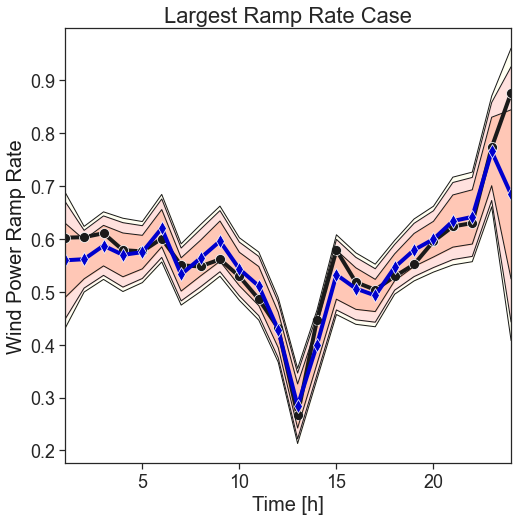

In [35]:
c1 = ["#0000CD"]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 8))
plt.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('Time [h]', fontsize=20)
ax.set_ylabel('Wind Power Ramp Rate', color='k', fontsize=20)
plt.title('Largest Ramp Rate Case', fontsize=22)

ax.set_xlim([1, 24])
sns.lineplot(times, maxdat, linewidth=4, color='k', marker="o", markersize=10)
sns.lineplot(times, maxpre, linewidth=4, color="#0000CD", marker="d", markersize=10, alpha=1)

# 99.5
sns.lineplot(times, maxu995, linewidth=1, color="k", alpha=1)
alpha = sns.lineplot(times, maxl995, linewidth=1, color="k", alpha=1)
line = alpha.get_lines()
plt.fill_between(line[0].get_xdata(), line[2].get_ydata(), line[3].get_ydata(), color="#FFFFE0", alpha=.4)

# 99
sns.lineplot(times, maxu99, linewidth=1, color="k", alpha=1)
beta = sns.lineplot(times, maxl99, linewidth=1, color="k", alpha=1)
line = beta.get_lines()
plt.fill_between(line[0].get_xdata(), line[4].get_ydata(), line[5].get_ydata(), color="#FFB6C1", alpha=.4)

# 95
sns.lineplot(times, maxu95, linewidth=1, color="k", alpha=1)
gamma = sns.lineplot(times, maxl95, linewidth=1, color="k", alpha=1)
line = gamma.get_lines()
plt.fill_between(line[0].get_xdata(), line[6].get_ydata(), line[7].get_ydata(), color="#FFA07A", alpha=.4)

fig.savefig('Prob_largest ramp.png', dpi=1000, bbox_inches="tight")

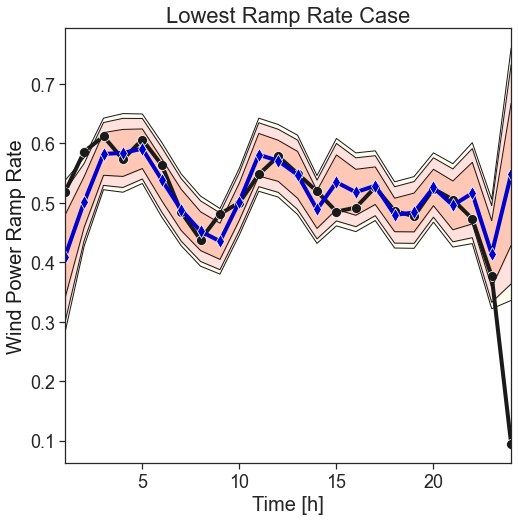

In [36]:
c1 = ["#0000CD"]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 8))
plt.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('Time [h]', fontsize=20)
ax.set_ylabel('Wind Power Ramp Rate', color='k', fontsize=20)
plt.title('Lowest Ramp Rate Case', fontsize=22)

ax.set_xlim([1, 24])
sns.lineplot(times, mindat, linewidth=4, color='k', marker="o", markersize=10)
sns.lineplot(times, minpre, linewidth=4, color="#0000CD", marker="d", markersize=10, alpha=1)

# 99.5
sns.lineplot(times, minu995, linewidth=1, color="k", alpha=1)
alpha = sns.lineplot(times, minl995, linewidth=1, color="k", alpha=1)
line = alpha.get_lines()
plt.fill_between(line[0].get_xdata(), line[2].get_ydata(), line[3].get_ydata(), color="#FFFFE0", alpha=.4)

# 99
sns.lineplot(times, minu99, linewidth=1, color="k", alpha=1)
beta = sns.lineplot(times, minl99, linewidth=1, color="k", alpha=1)
line = beta.get_lines()
plt.fill_between(line[0].get_xdata(), line[4].get_ydata(), line[5].get_ydata(), color="#FFB6C1", alpha=.4)

# 95
sns.lineplot(times, minu95, linewidth=1, color="k", alpha=1)
gamma = sns.lineplot(times, minl95, linewidth=1, color="k", alpha=1)
line = gamma.get_lines()
plt.fill_between(line[0].get_xdata(), line[6].get_ydata(), line[7].get_ydata(), color="#FFA07A", alpha=.4)

fig.savefig('Prob_lowest ramp.png', dpi=1000, bbox_inches="tight")

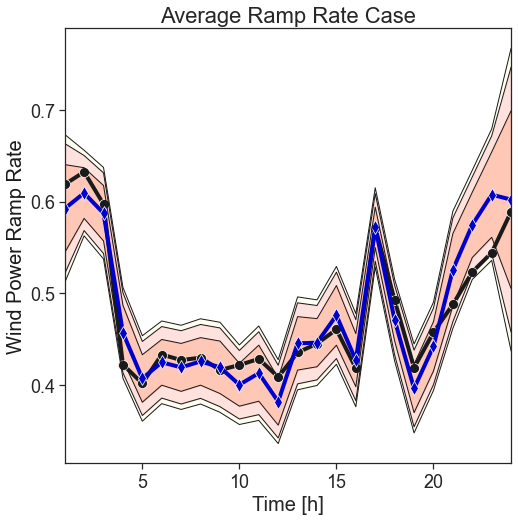

In [37]:
c1 = ["#0000CD"]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 8))
plt.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('Time [h]', fontsize=20)
ax.set_ylabel('Wind Power Ramp Rate', color='k', fontsize=20)
plt.title('Average Ramp Rate Case', fontsize=22)

ax.set_xlim([1, 24])
sns.lineplot(times, avgdat, linewidth=4, color='k', marker="o", markersize=10)
sns.lineplot(times, avgpre, linewidth=4, color="#0000CD", marker="d", markersize=10, alpha=1)

# 99.5
sns.lineplot(times, avgu995, linewidth=1, color="k", alpha=1)
alpha = sns.lineplot(times, avgl995, linewidth=1, color="k", alpha=1)
line = alpha.get_lines()
plt.fill_between(line[0].get_xdata(), line[2].get_ydata(), line[3].get_ydata(), color="#FFFFE0", alpha=.4)

# 99
sns.lineplot(times, avgu99, linewidth=1, color="k", alpha=1)
beta = sns.lineplot(times, avgl99, linewidth=1, color="k", alpha=1)
line = beta.get_lines()
plt.fill_between(line[0].get_xdata(), line[4].get_ydata(), line[5].get_ydata(), color="#FFB6C1", alpha=.4)

# 95
sns.lineplot(times, avgu95, linewidth=1, color="k", alpha=1)
gamma = sns.lineplot(times, avgl95, linewidth=1, color="k", alpha=1)
line = gamma.get_lines()
plt.fill_between(line[0].get_xdata(), line[6].get_ydata(), line[7].get_ydata(), color="#FFA07A", alpha=.4)

fig.savefig('Prob_average ramp.png', dpi=1000, bbox_inches="tight")